# **Insurance Cost Analysis**

#### Dataset Description

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

#### Objectives 

 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 

### Importing Required Libraries


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

## 1. Import the dataset

### Read CSV file

In [104]:
# Read CSV file
filepath = "C:/Users/Priyank/Desktop/Projects/Data Analytics/2_Insurance Cost Analysis/insurance.csv"
df = pd.read_csv(filepath, header=None)

In [105]:
print(df.head())

    0  1       2  3  4  5            6
0  19  1  27.900  0  1  3  16884.92400
1  18  2  33.770  1  0  4   1725.55230
2  28  2  33.000  3  0  4   4449.46200
3  33  2  22.705  0  0  1  21984.47061
4  32  2  28.880  0  0  1   3866.85520


Add the headers to the dataframe

In [107]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

Replace the '?' entries with 'NaN' values.

In [109]:
df.replace('?', np.nan, inplace = True)

## 2. Data Wrangling

Identify the columns that have some 'Null' (or NaN) values.

In [112]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


Handle missing data:

- For continuous attributes (e.g., age), we will replace the missing values with mean.
- For categorical attributes (e.g., smoker), we will replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update.

In [114]:
# smoker is a categorical attribute, replace with most frequent entry

# is_smoker = df['smoker'].value_counts().idxmax()
# df["smoker"].replace(np.nan, is_smoker, inplace=True)

# Find the most frequent entry in 'smoker' column
is_smoker = df['smoker'].mode()[0]  # Use mode() instead of value_counts().idxmax()

# Replace NaN values with the most frequent entry
df['smoker'] = df['smoker'].fillna(is_smoker)

In [115]:
# age is a continuous variable, replace with mean age

# mean_age = df['age'].astype('float').mean(axis=0)
# df["age"].replace(np.nan, mean_age, inplace=True)

# Compute the mean age
mean_age = df['age'].astype(float).mean()
# Replace NaN values in 'age' with the mean
df['age'] = df['age'].fillna(mean_age)

In [116]:
# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

In [117]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int32  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int32  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.1 KB
None


In [118]:
df.head(5)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


The `charges` column has values which are more than 2 decimal places long. Update the `charges` column such that all values are rounded to nearest 2 decimal places.

In [120]:
df[["charges"]] = np.round(df[["charges"]],2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


## 3. Exploratory Data Analysis (EDA)

The regression plot for `charges` with respect to `bmi`. 

(0.0, 66902.85800000001)

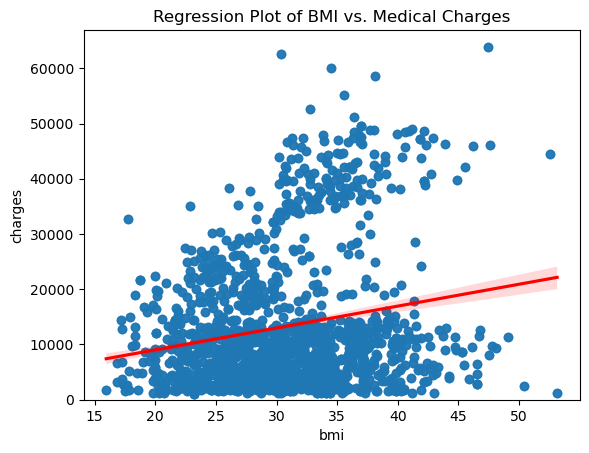

In [122]:
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.title("Regression Plot of BMI vs. Medical Charges")
plt.ylim(0,None)

The box plot for charges with respect to smoker.

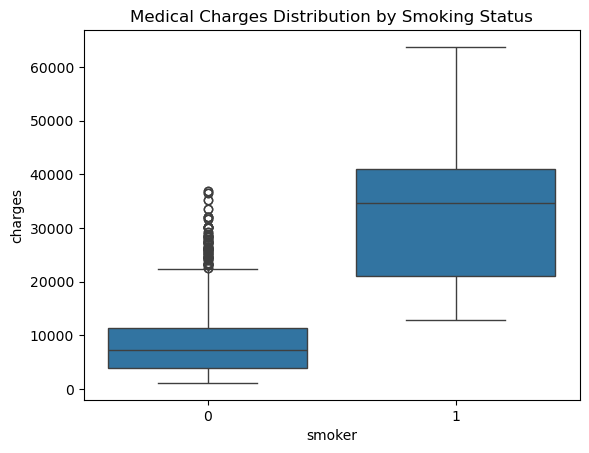

In [124]:
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Medical Charges Distribution by Smoking Status")
plt.show()

The correlation matrix for the dataset.

In [126]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


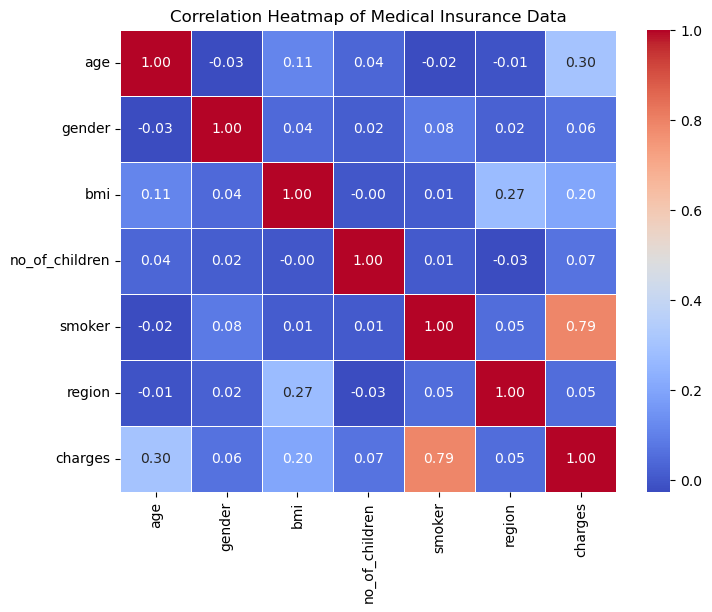

In [127]:
# Set the figure size
plt.figure(figsize=(8, 6))
# Create the heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Medical Insurance Data")
plt.show()

### Interpretation:

#### 1.Strongest Positive Correlation:
- Smoker vs. Charges (0.7888): This is the strongest correlation in the table, indicating that smoking has a significant impact on increasing medical charges.
- Age vs. Charges (0.2986): Older individuals tend to have higher medical expenses, but the correlation is moderate.
- BMI vs. Charges (0.1998): Higher BMI is associated with higher medical charges, but the correlation is weak to moderate.

#### 2. Weak or Negligible Correlation:
- Gender vs. Charges (0.0628): Gender has almost no influence on medical charges.
- Number of Children vs. Charges (0.0664): Having more children does not strongly affect medical costs.
- Region vs. Charges (0.0541): The region where an individual lives has little impact on medical expenses.

#### 3. Other Notable Correlations:
- BMI vs. Region (0.2711): Some correlation suggests that BMI distribution varies across regions.
- Age vs. BMI (0.1130): Weak correlation, meaning BMI does not significantly change with age.
- Gender vs. Smoker (0.0823): A slight positive correlation, suggesting minor gender differences in smoking habits.

#### Conclusion:
- Smoking has the highest impact on medical charges (0.7888 correlation), making it a critical factor in predicting costs.
- Age and BMI contribute to medical expenses but with lower impact than smoking.
- Other factors like gender, number of children, and region have minimal influence on charges.

## 4. Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset.

In [130]:
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))

0.6221791733924185


Fit a linear regression model that may be used to predict the charges value, just by using all other attributes of the dataset. You can see an improvement in the performance..

In [132]:
# definition of Y and lm remain same as used in last cell. 
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))

0.7504083820289634


Created a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There will be even further improvement in the performance.

In [134]:
# Y and Z use the same values as defined in previous cells 
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

0.8452577201066602


## 5. Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.

In [137]:
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.


In [139]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6760807731582406


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. 

In [141]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7835631107608056
